In [ ]:
import os
import librosa
import numpy as np

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store mean frequencies for males and females
male_mean_frequencies = []
female_mean_frequencies = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.startswith("male") and file_name.endswith(".wav"):
        # Load the audio file
        waveform, sample_rate = librosa.load(file_path)
        
        # Compute the spectrogram
        spectrogram = np.abs(librosa.stft(waveform))
        
        # Compute the frequency bins
        frequency_bins = librosa.fft_frequencies(sr=sample_rate)
        
        # Compute the mean frequency
        mean_frequency = np.average(frequency_bins, weights=spectrogram.sum(axis=1))
        
        # Append the mean frequency to the male list
        male_mean_frequencies.append(mean_frequency)
        
    elif file_name.startswith("fe") and file_name.endswith(".wav"):
        # Load the audio file
        waveform, sample_rate = librosa.load(file_path)
        
        # Compute the spectrogram
        spectrogram = np.abs(librosa.stft(waveform))
        
        # Compute the frequency bins
        frequency_bins = librosa.fft_frequencies(sr=sample_rate)
        
        # Compute the mean frequency
        mean_frequency = np.average(frequency_bins, weights=spectrogram.sum(axis=1))
        
        # Append the mean frequency to the female list
        female_mean_frequencies.append(mean_frequency)

print("Male Mean Frequencies:", male_mean_frequencies)
print("Female Mean Frequencies:", female_mean_frequencies)


In [ ]:
np.mean(male_mean_frequencies)

1656.7910727507171

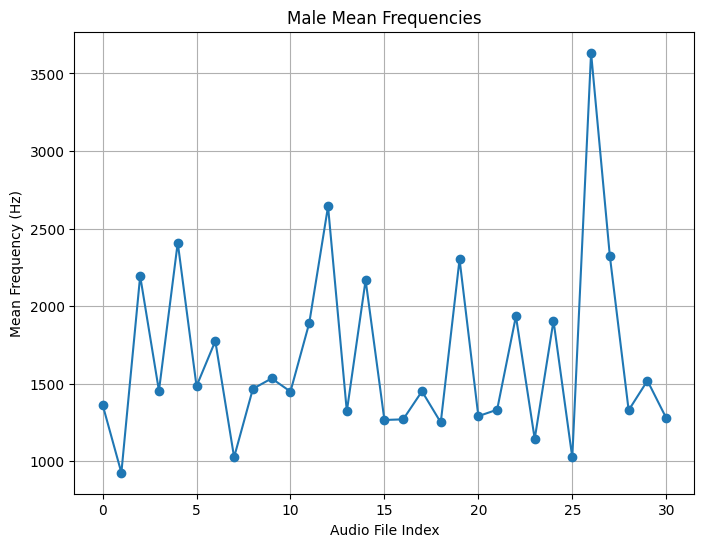

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(male_mean_frequencies, marker='o', linestyle='-')
plt.xlabel('Audio File Index')
plt.ylabel('Mean Frequency (Hz)')
plt.title('Male Mean Frequencies')
plt.grid(True)
plt.show()

1000 to 2500 Hz

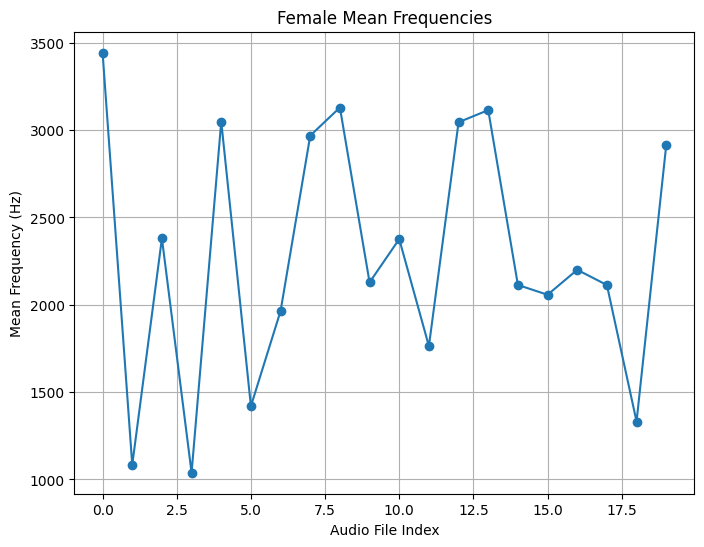

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(female_mean_frequencies, marker='o', linestyle='-')
plt.xlabel('Audio File Index')
plt.ylabel('Mean Frequency (Hz)')
plt.title('Female Mean Frequencies')
plt.grid(True)
plt.show()

---

In [1]:
import os
import librosa
import numpy as np

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store mean pitches for males and females
male_mean_pitches = []
female_mean_pitches = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.startswith("male") and file_name.endswith(".wav"):
        # Load the audio file
        waveform, sample_rate = librosa.load(file_path)
        
        # Extract pitch
        pitches, magnitudes = librosa.piptrack(y=waveform, sr=sample_rate)
        mean_pitch = np.mean(pitches[pitches > 0])
        
        # Append the mean pitch to the male list
        male_mean_pitches.append(mean_pitch)
        
    elif file_name.startswith("fe") and file_name.endswith(".wav"):
        # Load the audio file
        waveform, sample_rate = librosa.load(file_path)
        
        # Extract pitch
        pitches, magnitudes = librosa.piptrack(y=waveform, sr=sample_rate)
        mean_pitch = np.mean(pitches[pitches > 0])
        
        # Append the mean pitch to the female list
        female_mean_pitches.append(mean_pitch)

print("Male Mean Pitches:", male_mean_pitches)
print("Female Mean Pitches:", female_mean_pitches)


Male Mean Pitches: [871.8082, 1345.9788, 963.5758, 1191.7812, 1272.3402, 1112.2634, 971.53485, 959.98224, 1597.1375, 1579.4001, 1460.2191, 1148.4191, 1204.7072, 934.46576, 1723.5662, 1674.0938, 985.2919, 820.23676, 1073.718, 1538.3798, 1527.2588, 633.43896, 1224.3751, 1506.5115, 1454.8547, 1041.7971, 1402.7373, 1544.7546, 833.0423, 719.81824, 1655.5913]
Female Mean Pitches: [2009.859, 1469.9316, 1171.2643, 1552.2314, 1248.9219, 1178.8433, 1361.614, 1236.675, 1438.6497, 998.00665, 1628.5132, 1491.0061, 1307.8325, 1390.5118, 887.63367, 1165.8264, 1467.8113, 1471.2474, 773.3587, 1487.2084]


In [2]:
np.mean(male_mean_pitches)

1224.938

In [3]:
np.mean(female_mean_pitches)

1336.8474

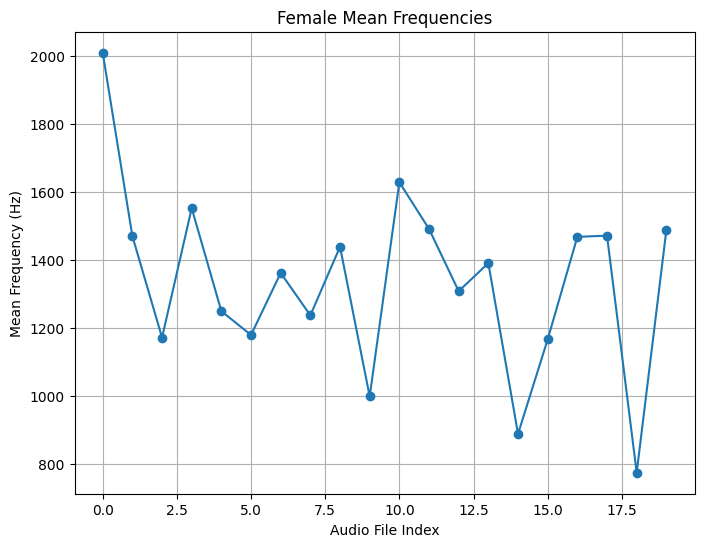

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(female_mean_pitches, marker='o', linestyle='-')
plt.xlabel('Audio File Index')
plt.ylabel('Mean Frequency (Hz)')
plt.title('Female Mean Frequencies')
plt.grid(True)
plt.show()

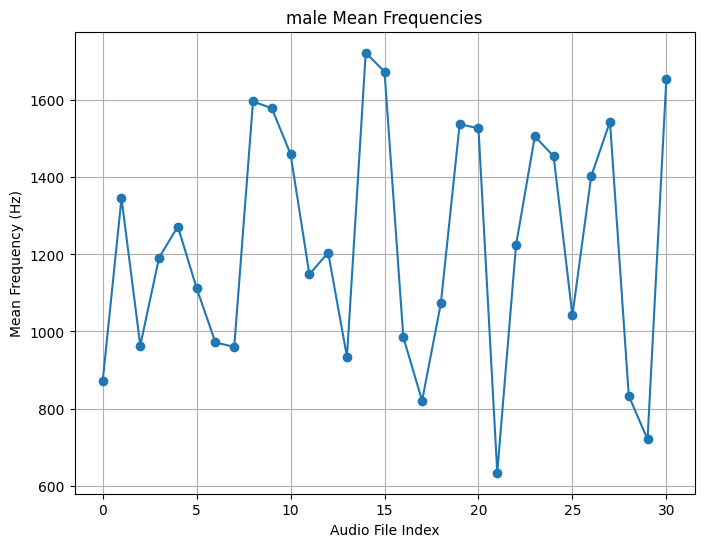

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(male_mean_pitches, marker='o', linestyle='-')
plt.xlabel('Audio File Index')
plt.ylabel('Mean Frequency (Hz)')
plt.title('male Mean Frequencies')
plt.grid(True)
plt.show()

In [19]:
import librosa
import numpy as np

# Load the audio file
audio_file = "Data/Trimmed audios/All/fe11.wav"
waveform, sample_rate = librosa.load(audio_file)

# Extract pitch
pitches, magnitudes = librosa.piptrack(y=waveform, sr=sample_rate)

# Calculate the mean pitch
mean_pitch = np.mean(pitches[pitches > 0])

print("Mean Pitch:", mean_pitch, "Hz")


Mean Pitch: 1552.2314 Hz


---

In [12]:
import librosa
import numpy as np
def extract_mfcc_fixed_length(file_path, max_length=216):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # print(mfccs.shape)


    if mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), 'constant')
        # padded_arr_1d = np.pad(arr_1d, (2, 2), mode='constant')
        print(mfccs.shape)
    elif mfccs.shape[1] > max_length:
        mfccs = mfccs[:, :max_length]
        print(mfccs.shape)

In [13]:
audio_file = "Data/Trimmed audios/All/fe11.wav"
extract_mfcc_fixed_length(audio_file)


(13, 216)


In [7]:
import numpy as np

# Example 1D array
arr_1d = np.array([1, 2, 3, 4, 5])

# Pad with two zeros on each side
padded_arr_1d = np.pad(arr_1d, (2, 2), mode='constant')

print("Original array:")
print(arr_1d)

print("\nPadded array:")
print(padded_arr_1d)


Original array:
[1 2 3 4 5]

Padded array:
[0 0 1 2 3 4 5 0 0]


---

In [2]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
import os
# from google.colab import drive

In [10]:
mfcc_data = pd.read_csv("Data/audio mfcc data.csv")

X_train, X_test, y_train, y_test = train_test_split(mfcc_data.drop('Gender', axis=1), mfcc_data['Gender'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


C:\Users\hrbhat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
chroma_data = pd.read_csv("Data/audio chroma_cens data.csv")

X_train, X_test, y_train, y_test = train_test_split(chroma_data.drop('Gender', axis=1), chroma_data['Gender'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364
